## Imports

In [200]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sbn
sbn.set()
sbn.set_context("talk")
sbn.set_style("whitegrid")

## Get data

In [4]:
data = pd.read_csv("imdb_indian_te.csv",date_parser="releaseDate")
print(data.dtypes)
data.shape

id              int64
name           object
duration        int64
genre          object
titleYear       int64
releaseDate    object
director       object
language       object
budget         object
cast           object
link           object
dtype: object


(3544, 11)

### Filter out all movies where duration=0

In [5]:
data_with_duration = data[data['duration']>0]
data_with_duration.shape

(1012, 11)

##### duration graphs

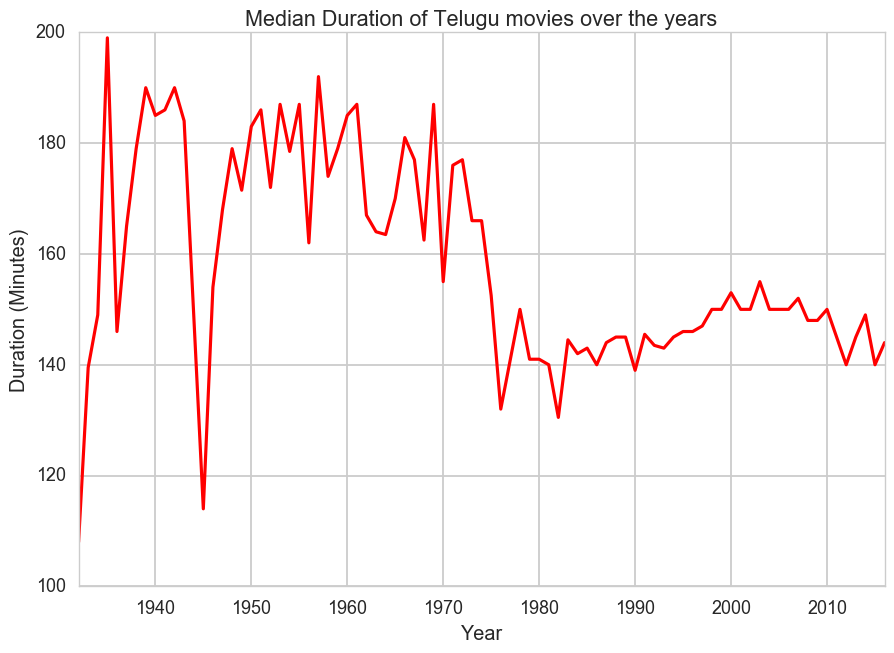

In [201]:
yearGroup = data_with_duration.groupby('titleYear')
durationGroup = yearGroup['duration']
#plt.figure(1)
ax=durationGroup.median().plot(title="Median Duration of Telugu movies over the years",color="red")
ax.set_xlabel("Year")
ax.set_ylabel("Duration (Minutes)")
plt.show()

#### number of movies per year graphs

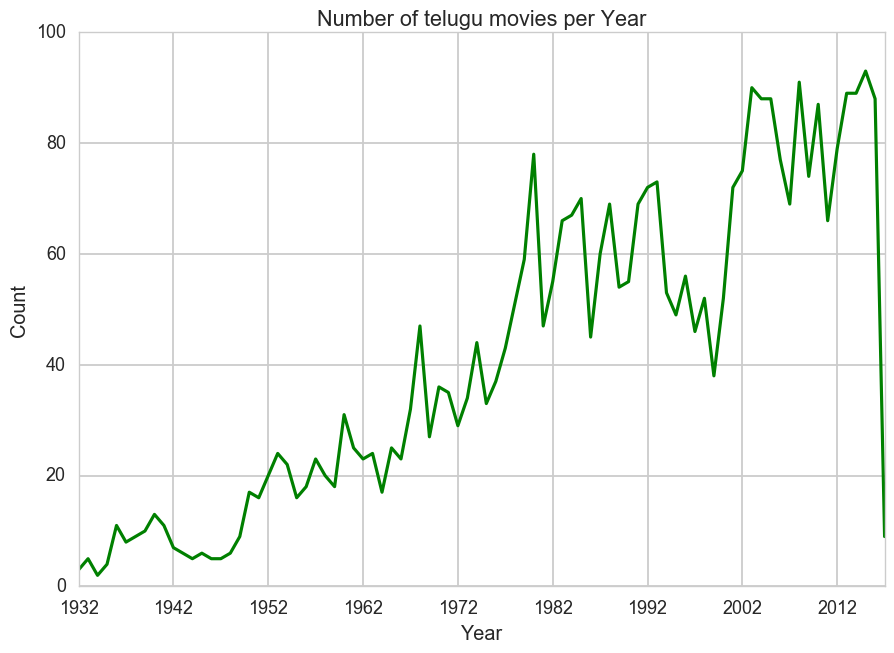

In [202]:
yearGroup = data.groupby('titleYear')
#plt.figure(1)
ax = yearGroup['titleYear'].count().plot(title="Number of telugu movies per Year",color="green")
ax.set_xlabel("Year")
ax.set_ylabel("Count")
start,end = ax.get_xlim()
ax.xaxis.set_ticks(np.arange(start,end,10))
plt.show()

#### Number of movies per month.

In [92]:
releaseData = data.dropna(subset=['releaseDate'])
releaseData["releaseMonth"] = pd.DatetimeIndex(releaseData['releaseDate']).month
print releaseData.dtypes

id               int64
name            object
duration         int64
genre           object
titleYear        int64
releaseDate     object
director        object
language        object
budget          object
cast            object
link            object
releaseMonth     int32
dtype: object


c:\miniconda2\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


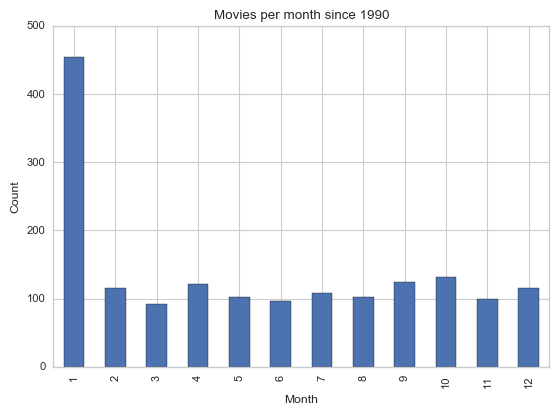

In [203]:
releaseMonth  = releaseData[releaseData['titleYear']>1989].groupby(['releaseMonth'])['releaseMonth'].count()

#plt.figure()
sbn.set_context("paper")
ax = releaseMonth.plot(kind='bar',title="Movies per month since 1990",)
ax.set_xlabel("Month")
ax.set_ylabel("Count")
plt.show()


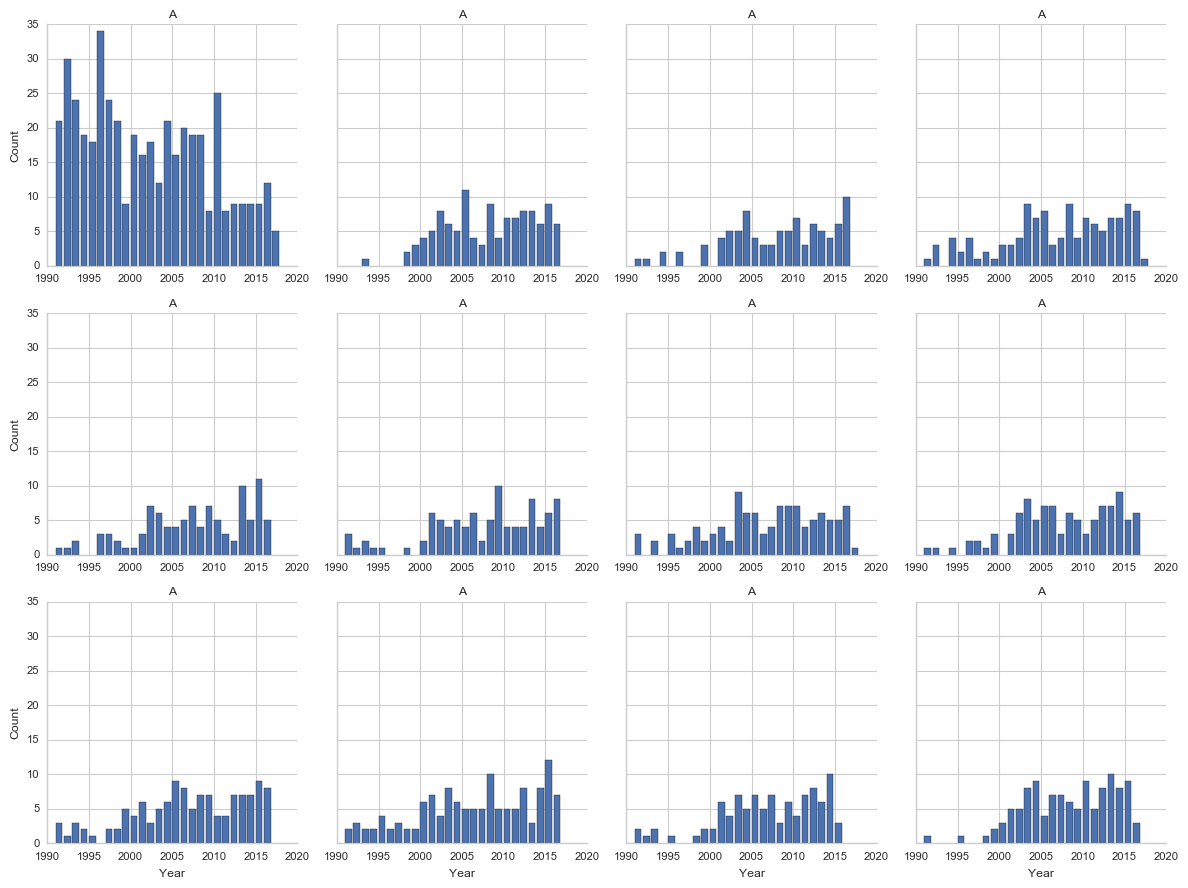

In [206]:
releaseData = releaseData[releaseData['titleYear']>1989]
releaseMonthYear =releaseData.groupby(['releaseMonth','titleYear'])['releaseMonth'].count().reset_index(name="count")
g = sbn.FacetGrid(data=releaseMonthYear,col="releaseMonth",col_wrap=4,sharex=False)
g.map(plt.bar
      ,"titleYear","count")
g.set_xlabels("Year")
g.set_axis_labels(y_var='Count',x_var='Year')
g.set_titles(["A","B","C"])
plt.show()
g.savefig("titleYear.png")